### 회귀식
$y = \beta_0 + \beta_1x_1 + \ldots + \beta_nx_n
 = \beta_0 + \sum_{j=1}^n \beta_j x_j$
 
벡터표기
$x^{m}_{n}$
>즉, 위첨자 superscript (j)는 j번째 열
아래첨자 subscript (i)는 i번째 행을 의미한다.

argmin
$\hat{w} = argmin_{w} (y-wx)^2$
오류를 최소화 하는 w 구하기

- 비표준화된 회귀식 unstandardized regression equation
$$ Y = a + b \times X $$

- 표준화된 standardized regression equation
$$ z_y = a + b \times z_x $$

- general linear model (오류가 정규분포를 따를 때)
$$ y_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_p x_{pi} + \epsilon_i $$

- GLM(일반화선형모델 generalized linear model) 오류가 정규분포를 따르지 않는 경우

#### OLS Ordinary Least Square 오류를 최소화하여 회귀식을 찾는 방법.
오류는 $y$실제 - $\hat{y}$예측 차이의 제곱을 합계낸 값

In [1]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

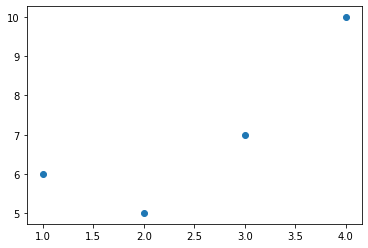

In [2]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

{(1,6),(2,5),(3,7),(4,10)}
- x, y 값을 하나씩 입력
$6 = \beta_0 + \beta_1 \times 1$\
$5 = \beta_0 + \beta_1 \times 2$\
$7 = \beta_0 + \beta_1 \times 3$\
$10 = \beta_0 + \beta_1 \times 4$

- 오류 $(y-yhat)^2$를 최소화\
$(6 - (\beta_0 + \beta_1 \times 1))^2$\
$(5 - (\beta_0 + \beta_1 \times 2))^2$\
$(7 - (\beta_0 + \beta_1  \times 3))^2$\
$(10 - (\beta_0 + \beta_1  \times 4))^2$

- 위 식을 모두 더해서 총오류를 구하면:
$f=210 + 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1$

- 위를 편미분하면(최소값 구할 떄 이차방정식에서 해를 찾았으니까):\
$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$\
$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$\

- 이를 풀면:
$\beta_0 = 3.5$\
$\beta_1 = 1.4$

=> 각 x 값에 기울기 1.4를 곱하고, y절편 3.5를 더해서 구할 수 있다.\
$yhat=3.5 + 1.4 x$

In [5]:
yhat=x*1.4+3.5
f"predicted: {yhat}"

'predicted: [4.9 6.3 7.7 9.1]'

In [6]:
f"predicted - actual: {yhat-y}"

'predicted - actual: [-1.1  1.3  0.7 -0.9]'

In [7]:
f"error: {np.sum(np.power(yhat-y,2))}"

'error: 4.199999999999998'

#### python 편미분 라이브러리\

spmpy diff 로 미분 할 수 있다\
Sympy solve()로 풀면 해를 구할 수 있다

In [8]:
import sympy as sp

In [9]:
b0,b1=sp.symbols('b0 b1')

In [10]:

f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1

In [11]:
#sp.diff 미분을 하는 함수 -> return 값은 식
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)

In [12]:
print ("fdiff with b0: {}\nfdiff with b1: {}".format(fdiff_b0, fdiff_b1))

fdiff with b0: 8*b0 + 20*b1 - 56
fdiff with b1: 20*b0 + 60*b1 - 154


In [13]:
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


### $R^2$

회귀분석을 하면서 회귀분석의 오류를 얼마나 설명했는지\
$r^2=\frac{RSS}{TSS}$
- 총오류 TSS (Total Sum of Squared Errors)
- 오류의 합계 SSE (Sum of Squared Errors)
- 잔여 오류 RSS (Residual Sum of Squared Errors)

In [14]:

x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

In [15]:
A=np.array([x, np.ones(9)])
print(A)

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [16]:
#numpy의 listsq()를 사용하여, 데이터의 회귀식 계수 w0, w1을 계산
#rcond=None 기본값을 주지 않는다. 값이 2개 주어지는데 우리는 [0]으로 첫 번째 값만 return
w0, w1=np.linalg.lstsq(A.T, y, rcond=None)[0] 
print ("w0: {}\nw1: {}".format(w0, w1))

w0: 0.7166666666666672
w1: 19.188888888888897


In [17]:
yhat=w0*x+w1
print ("예측: {}".format(yhat))

예측: [19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


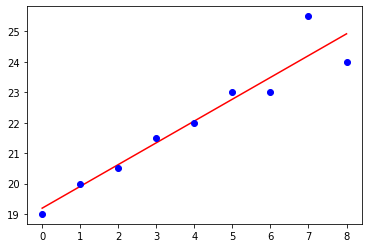

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo') #red의 실선, blue의 동그라미, 빨간선 예측값
plt.show()

In [19]:
#R squared 계산
RSS = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)

r_squared = 1 - (float(RSS))/TSS
f"r_squared: {r_squared}"

'r_squared: 0.9138385502471171'

#### adjusted R-squared
독립변수의 개수에 따라 과도한 $R^2$를 수정한 값\
$R^2\space adjusted=1 - \frac{(1-R^2)(n-1)}{n-k-1}$
- n은 데이터 개수
- k는 독립변수 개수

In [22]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)
f"adjusted_r_squared: {adjusted_r_squared}"

'adjusted_r_squared: 0.8851180669961561'

#### statsmodels R squared

In [23]:
import statsmodels.api as sm

result = sm.OLS(y, A.T).fit()

In [24]:
result.summary()

C:\Users\joann\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           5.66e-05
Time:                        03:25:38   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.000       0.520       0.913
const         19.1889      0.396     48.458      0.000      18.253      20.125
==============================================================================
Omnibus:                        4.624   Durbin-Watson:                   3.078
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.154
Skew:                           0.773   Prob(JB):                        0.561
Kurtosis:                       3.830   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
result.rsquared, result.rsquared_adj

(0.9138385502471168, 0.9015297717109907)

### matrix inverse method

$\hat{w}$ 최소해를 구하는데, 오류는 sum of squared residuals\
$f = e.T \times e = (y-wx)^T (y-wx) = y^Ty - 2w(x^Ty)^T+w^Tx^Twx$

- 위를 미분하면\
$\frac{\partial f}{\partial w} =
    0 -2(x^Ty)+2wx^Tx$

- 위 미분 값을 0으로 놓고 풀면, \
$-2x^Ty + 2\hat{w}x^Tx = 0$

- 위 식을 정리하면 \
$\hat{w} = (X^T X) ^{-1} X^T y$

$2x_1 - 4x_2 = 8$\
$3x_1 + 6x_2 = 9$

In [26]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

In [27]:
#출력 자릿수를 2자리로 제한
np.set_printoptions(precision=2, suppress=True)

In [28]:
#X의 역행렬
xI = np.linalg.inv(x) 
print("x inv:\n{}".format(xI))

x inv:
[[ 0.25  0.17]
 [-0.12  0.08]]


In [29]:
#identity matrix =단위행렬
np.eye(2)

array([[1., 0.],
       [0., 1.]])

- 위 식을 행렬로 나타내면\
 $\beta \times x = y$
 
- 양변에 $x^{-1}$를 곱하면\
$x^{-1}\times x\times \beta=x^{-1}\times y$

- $x^{-1}\times x=1$이므로 아래와 같이 $\beta$를 구할 수 있다.\
$\beta=x^{-1}\times y$


In [30]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

x1 = np.linalg.inv(x)
w1, w2 = np.dot(x1, y)
print(w1, w2)

3.5 -0.25


#### numpy solve
numpy.linalg.solve()는 선형 벡터 식을 풀 수 있다

In [31]:
np.linalg.solve(x,y)

array([ 3.5 , -0.25])

####### 새로운 문제

In [43]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [44]:
x[:,np.newaxis]
x=np.array([x, np.ones(len(x))])
x=x.T
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


In [45]:
x.shape

(4, 2)

#### singular matrix
singlular matrix의 inverse()는 할 수 없다.
 $\frac{1}{ad-bc} \begin{pmatrix}d &amp; -b\\-c &amp; a\end{pmatrix}$
 
 이때 $ad -bc=0$ 인 경우이다. 

In [46]:
#np.dot(x,X.T) -> singular martix

#x와 x.T 순서 바꿔서 계산
xTx=np.dot(x.T,x)
print("xTx=",xTx)

xTx= [[30. 10.]
 [10.  4.]]


##### $(X^T X) ^{-1}$ 계산

In [48]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

xTxI= [[ 0.2 -0.5]
 [-0.5  1.5]]


##### $X^T y$ 계산

In [49]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

xTyT= [77. 28.]


##### 전체 $(X^T X) ^{-1} X^T y$ 계산

In [50]:
print("weights=",np.dot(xTxI,xTyT))

weights= [1.4 3.5]


#### 위의 여러번의 과정을 한 줄로 계산

In [52]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
print(w1, w0)

1.4000000000000021 3.499999999999993


### numpy 최소자승법
위의 같은 데이터를 least square 로 구하기

In [53]:
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

numpy lstsq:  (array([1.4, 3.5]), array([4.2]), 2, array([5.78, 0.77]))


In [54]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

w1= 1.4000000000000006 
w0= 3.499999999999998


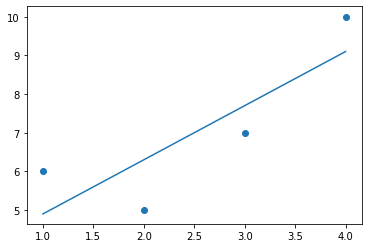

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# (1) data ready
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))]) # shape (2,4)
# (2) change (2,4) -> (4,2), so x0:1,2,3,4 x1:1,1,1,1
# w0 for x0, w1 for x1
_x=_x.T # shape (4,2)
# (3) compute w
#w1,w0=np.linalg.lstsq(_x, y, rcond=None)[0]
w1, w0=np.dot(np.linalg.inv(np.dot(_x.T, _x)), np.dot(_x.T, y)) #1.4 3.5
# (4) predicted
yhat=w0+w1*x
# (5) graph
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)